<a href="https://colab.research.google.com/github/ArthurBoschet/Chilblains-Analysis/blob/main/descriptive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [9]:
import os

from google.colab import drive
drive.mount('/content/drive', force_remount = False)

FOLDER = "drive/MyDrive/Derm_Registry_Derm_Data_Project/"
dataset_path = os.path.join(FOLDER, "processed_dataset.xlsx")
save_path = os.path.join(FOLDER, 'figures')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

# Functions

In [11]:
def make_numerical_descriptive(numerical_features, group='All Patients'):
  num_descriptive = pd.concat([numerical_features.mean(), numerical_features.std(), 1 - numerical_features.isna().mean(), numerical_features.shape[0] - numerical_features.isna().sum()], axis=1)
  num_descriptive.columns=["mean", "std", "answer rate", "n"]
  tups = zip(*[[group]*num_descriptive.shape[1],num_descriptive.columns])

  num_descriptive.columns = pd.MultiIndex.from_tuples(tups, names=['Group','Statistic'])
  num_descriptive = num_descriptive.T
  return num_descriptive


def make_categorical_descriptive(numerical_features, group='All Patients'):
  num_descriptive = pd.concat([numerical_features.mean(), numerical_features.std(), 1 - numerical_features.isna().mean(), numerical_features.shape[0] - numerical_features.isna().sum()], axis=1)
  num_descriptive.columns=["proportion", "std", "answer rate", "n"]
  tups = zip(*[[group]*num_descriptive.shape[1],num_descriptive.columns])

  num_descriptive.columns = pd.MultiIndex.from_tuples(tups, names=['Group','Statistic'])
  num_descriptive = num_descriptive.T
  return num_descriptive

def create_categorical_dataframe_question(categorical_features, question, answers, group="All Patients"):

  base_num = categorical_features.shape[0]
  categories = [question +" ### "+ answer for answer in answers]
  categorical_features = categorical_features[categories]
  categorical_features = categorical_features[categorical_features.sum(axis=1) > 0]

  tups = zip(*[[question]*categorical_features.shape[1], answers])

  categorical_features.columns = pd.MultiIndex.from_tuples(tups, names=['Question','Answer'])

  categorical_features = pd.concat([categorical_features.mean(), categorical_features.apply(len)/base_num ,categorical_features.apply(len)], axis=1)
  categorical_features.columns=["proportion", "answer rate", "n"]

  tups = zip(*[[group]*categorical_features.shape[1],categorical_features.columns])

  categorical_features.columns = pd.MultiIndex.from_tuples(tups, names=['Group','Statistic'])
  categorical_features = categorical_features.T

  return categorical_features

def create_categorical_dataframe(categorical_features, group="All Patients"):
  split_categorical = [col.split(" ### ") for col in categorical_features.columns[1:]]
  questions = set([l[0] for l in split_categorical])

  questions_answers = {l[0]:[] for l in split_categorical}
  for l in split_categorical:
    questions_answers[l[0]].append(l[1])
  return pd.concat([create_categorical_dataframe_question(categorical_features, question, answers, group=group) for question, answers in questions_answers.items()], axis=1)


# Descriptive Analysis

In [57]:
#load the dataset into pandas
dataset_preprocessed = pd.read_excel(dataset_path)

In [58]:
categorical_features, numerical_features, chilbains =  dataset_preprocessed.iloc[:,:-9], dataset_preprocessed.iloc[:,-9:-1], dataset_preprocessed.iloc[:,-1]

## Categorical Data

In [59]:
categorical_features.head()

,Unnamed: 0,What was the patient's assigned sex at birth? ### Male,What was the patient's assigned sex at birth? ### Female,What was the patient's assigned sex at birth? ### Other,Hospital or clinic country ### Spain,Hospital or clinic country ### Italy,Hospital or clinic country ### Ireland {Republic},Hospital or clinic country ### Nigeria,Hospital or clinic country ### Afghanistan,Hospital or clinic country ### Guatemala,...,Other site of edema: ### Tongue,Other site of edema: ### angioedema - tongue/airway,Other negative antibody ### nucleocapsid,Other negative antibody ### IgG negative,Other ocular finding: ### Subconjunctival hemorrhage,Other: ### Hong Kong SAR,Other: ### Puerto Rico,Other positive antibody ### IgG and IgA positive,Other positive antibody ### IgM unknown,Other assigned sex: ### Both male and female
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
categorical_features_chil = categorical_features[chilbains==1]
categorical_features_no_chil = categorical_features[chilbains==0]
descriptive_categorical = pd.concat([create_categorical_dataframe(cat_feat, group=group) for cat_feat, group in zip([categorical_features, categorical_features_chil, categorical_features_no_chil], [f"All Patients (n={dataset_preprocessed.shape[0]})", f"Chilblains (n={np.sum(chilbains==1)})", f"No Chilblains (n={np.sum(chilbains==0)})"] )])

In [61]:
temps = []
for question in descriptive_categorical.columns.get_level_values('Question').unique():
  temp = descriptive_categorical[question].sort_values(('Chilblains (n=672)','proportion'), axis=1, ascending=False)
  tups = [(question, col) for col in temp.columns]
  temp.columns = pd.MultiIndex.from_tuples(tups, names=['Question','Answer'])
  temps.append(temp)
descriptive_categorical = pd.concat(temps, axis=1)

In [62]:
descriptive_categorical

Question                          What was the patient's assigned sex at birth?  \
Answer                                                                     Male   
Group                 Statistic                                                   
All Patients (n=1333) proportion                                       0.453113   
                      answer rate                                      1.000000   
                      n                                             1333.000000   
Chilblains (n=672)    proportion                                       0.501488   
                      answer rate                                      1.000000   
                      n                                              672.000000   
No Chilblains (n=661) proportion                                       0.403933   
                      answer rate                                      1.000000   
                      n                                              661.000000   

Question                                                     \
Answer                                  Female        Other   
Group                 Statistic                               
All Patients (n=1333) proportion      0.546137     0.000750   
                      answer rate     1.000000     1.000000   
                      n            1333.000000  1333.000000   
Chilblains (n=672)    proportion      0.498512     0.000000   
                      answer rate     1.000000     1.000000   
                      n             672.000000   672.000000   
No Chilblains (n=661) proportion      0.594554     0.001513   
                      answer rate     1.000000     1.000000   
                      n             661.000000   661.000000   

Question                          Hospital or clinic country                \
Answer                                          United States       Canada   
Group                 Statistic                                              
All Patients (n=1333) proportion                     0.828571     0.018797   
                      answer rate                    0.997749     0.997749   
                      n                           1330.000000  1330.000000   
Chilblains (n=672)    proportion                     0.903130     0.025335   
                      answer rate                    0.998512     0.998512   
                      n                            671.000000   671.000000   
No Chilblains (n=661) proportion                     0.752656     0.012140   
                      answer rate                    0.996974     0.996974   
                      n                            659.000000   659.000000   

Question                                                                    \
Answer                            United Kingdom       France  Netherlands   
Group                 Statistic                                              
All Patients (n=1333) proportion        0.021805     0.003008     0.003759   
                      answer rate       0.997749     0.997749     0.997749   
                      n              1330.000000  1330.000000  1330.000000   
Chilblains (n=672)    proportion        0.020864     0.005961     0.005961   
                      answer rate       0.998512     0.998512     0.998512   
                      n               671.000000   671.000000   671.000000   
No Chilblains (n=661) proportion        0.022762     0.000000     0.001517   
                      answer rate       0.996974     0.996974     0.996974   
                      n               659.000000   659.000000   659.000000   

Question                                                     ...  \
Answer                                  Mexico South Africa  ...   
Group                 Statistic                              ...   
All Patients (n=1333) proportion      0.020301     0.004511  ...   
                      answer rate     0.997749     0.997749  ...   
                      n         

In [63]:
descriptive_categorical.to_excel(FOLDER+"/descriptive/categorical.xlsx")

## Numerical Data

In [ ]:
numerical_features.head()

,What is the patient's age in years?,How many days after Covid symptoms started did the rash develop?,Approximately how many days passed from COVID-19 symptom onset to resolution?,For how many days did the patient have the skin findings?,How many days before Covid symptoms started did the rash develop?,In which month and year did the pernio lesions start again?,In which month and year did the pernio lesions clear?,In which year did the patient receive the first booster dose of the COVID-19 vaccine?
0,34,NaN,7.0,3.0,NaN,NaN,NaN,NaN
1,47,NaN,7.0,1.0,NaN,NaN,NaN,NaN
2,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,67,NaN,6.0,NaN,NaN,NaN,NaN,NaN
4,16,NaN,14.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
numerical_features_chil = numerical_features[chilbains==1]
numerical_features_no_chil = numerical_features[chilbains==0]
descriptive_numerical = pd.concat([make_numerical_descriptive(num_feat, group) for num_feat, group in zip([numerical_features, numerical_features_chil, numerical_features_no_chil], [f"All Patients (n={dataset_preprocessed.shape[0]})", f"Chilblains (n={np.sum(chilbains==1)})", f"No Chilblains (n={np.sum(chilbains==0)})"] )])

In [ ]:
descriptive_numerical

What is the patient's age in years?  \
Group                 Statistic                                          
All Patients (n=1333) mean                                   37.136534   
                      std                                    19.725807   
                      answer rate                             1.000000   
                      n                                    1333.000000   
Chilblains (n=672)    mean                                   31.558036   
                      std                                    16.962646   
                      answer rate                             1.000000   
                      n                                     672.000000   
No Chilblains (n=661) mean                                   42.807867   
                      std                                    20.709045   
                      answer rate                             1.000000   
                      n                                     661.000000   

                                   How many days after Covid symptoms started did the rash develop?  \
Group                 Statistic                                                                       
All Patients (n=1333) mean                                                 20.023256                  
                      std                                                  33.363238                  
                      answer rate                                           0.290323                  
                      n                                                   387.000000                  
Chilblains (n=672)    mean                                                 32.019802                  
                      std                                                  45.087910                  
                      answer rate                                           0.150298                  
                      n                                                   101.000000                  
No Chilblains (n=661) mean                                                 15.786713                  
                      std                                                  26.930579                  
                      answer rate                                           0.432678                  
                      n                                                   286.000000                  

                                   Approximately how many days passed from COVID-19 symptom onset to resolution?  \
Group                 Statistic                                                                                    
All Patients (n=1333) mean                                                 14.099315                               
                      std                                                  11.567243                               
                      answer rate                                           0.219055                               
                      n                                                   292.000000                               
Chilblains (n=672)    mean                                                 16.578947                               
                      std                                                  15.279632                               
                      answer rate                                           0.169643                               
                      n                                                   114.000000                               
No Chilblains (n=661) mean                                                 12.511236                               
                      std                                                   8.026959                               
                      answer rate                                           0.269289                               
                      n                        

In [ ]:
descriptive_numerical.to_excel(FOLDER+"/descriptive/numerical.xlsx")

The proportion of patients with Chilblains is (positive class percentage) 0.5041260315078769


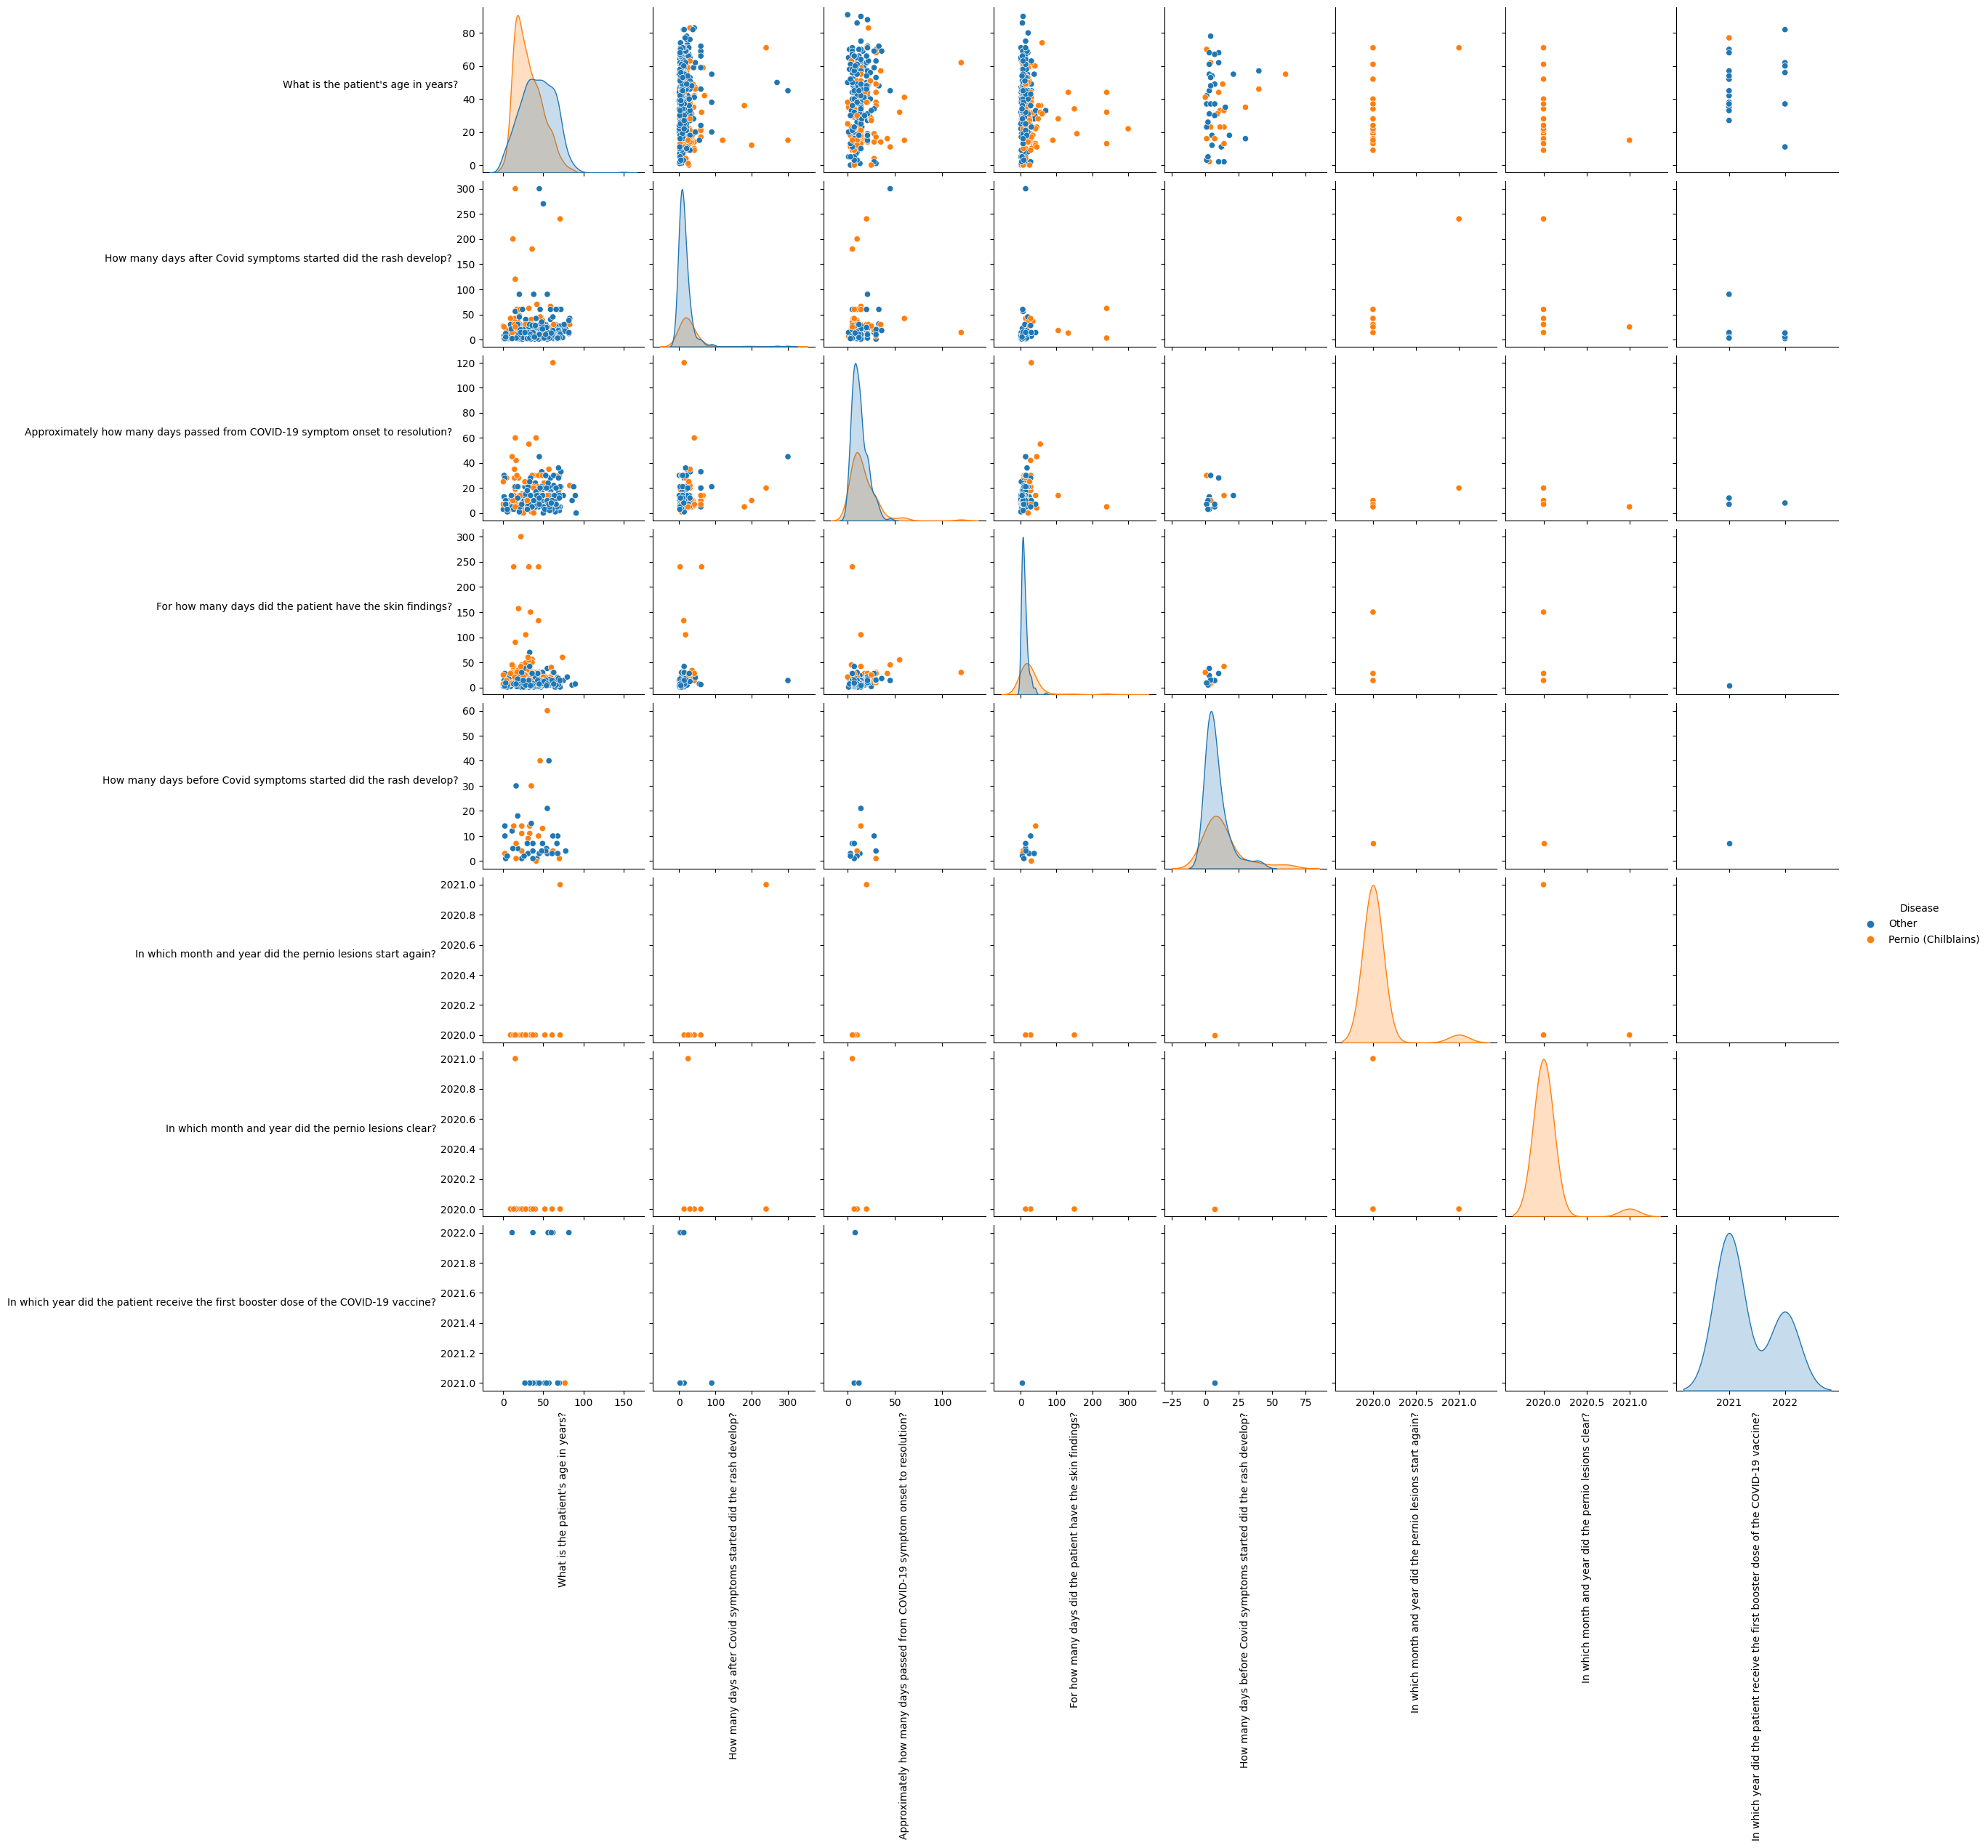

In [ ]:
#setup the target column
print(f"The proportion of patients with Chilblains is (positive class percentage) {chilbains.mean()}")

target_words = np.array([["Pernio (Chilblains)" if t else "Other" for t in chilbains]]).T
plot_data = pd.concat([numerical_features, pd.DataFrame(target_words, columns=['Disease'])], axis=1)
# plt.figure(figsize=(30,30))
g = sns.pairplot(plot_data, hue='Disease')
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')